# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\17735\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
news_api_key  = "5211ac8283cc4b3cbd20e33c28f9dcbf"

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q='Bitcoin', language='en')

In [5]:
#print number of articles
print(f" Total articles about Bitcoin: {bitcoin_news['totalResults']}")

 Total articles about Bitcoin: 8468


In [6]:
#sample article
bitcoin_news['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
etherium_news = newsapi.get_everything(q='Ethereum', language='en')

In [8]:
#print number of articles
print(f" Total articles about Ethereum: {etherium_news['totalResults']}")

 Total articles about Ethereum: 2484


In [9]:
#sample article
etherium_news['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [10]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [11]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

etherium_sentiments = []

for article in etherium_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        etherium_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
etherium_df = pd.DataFrame(etherium_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etherium_df = etherium_df[cols]

etherium_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [12]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.018580,0.055650,0.048850,0.895450
std,0.410904,0.066291,0.053598,0.075186
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.057500,0.907500
75%,0.220025,0.108750,0.077750,0.927750
max,0.726400,0.178000,0.184000,1.000000


In [13]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
etherium_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.235065,0.078650,0.024550,0.896800
std,0.387401,0.068866,0.035195,0.065884
min,-0.381800,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.361200,0.077500,0.000000,0.920000
75%,0.528675,0.149250,0.067500,0.925000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: the ethereum coin had the higher mean postive score of 0.07

Q: Which coin had the highest compound score?

A: the ethereum coin had the higher compound score of 0.77

Q. Which coin had the highest positive score?

A: the ethereum coin had the highest positive score of 0.19

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17735\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    

   
    # Create a tokenized list of the words
    sw = set(stopwords.words('english'))
       
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903,"[longtime, techcrunch, reader, know, well, mic..."


In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
etherium_df['tokens'] = etherium_df['text'].apply(tokenizer)
etherium_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('reuters', 'bitcoin'): 6, ('june', 'reuters'): 5, ('losing', 'previous'): 4, ('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4, ('cryptocurrency', 'char'): 4, ('char', 'reuters'): 4}


In [21]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
etherium_text = ' '.join(etherium_df.text)
etherium_processed = tokenizer(etherium_text)
etherium_ngrams = Counter(ngrams(etherium_processed, n=2))
print(dict(etherium_ngrams.most_common(10)))

{('world', 'biggest'): 5, ('cryptocurrency', 'char'): 5, ('reuters', 'bitcoin'): 5, ('ethereum', 'network'): 4, ('char', 'reuters'): 4, ('losing', 'previous'): 4, ('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4}


In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top = token_count(bitcoin_processed)
bitcoin_top

[('char', 19),
 ('bitcoin', 18),
 ('reuters', 14),
 ('cryptocurrency', 7),
 ('june', 7),
 ('world', 5),
 ('seen', 4),
 ('illustration', 4),
 ('monday', 4),
 ('losing', 4)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
etherium_top = token_count(etherium_processed)
etherium_top

[('char', 20),
 ('bitcoin', 11),
 ('cryptocurrency', 11),
 ('ethereum', 10),
 ('reuters', 9),
 ('world', 7),
 ('network', 5),
 ('biggest', 5),
 ('losing', 4),
 ('previous', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

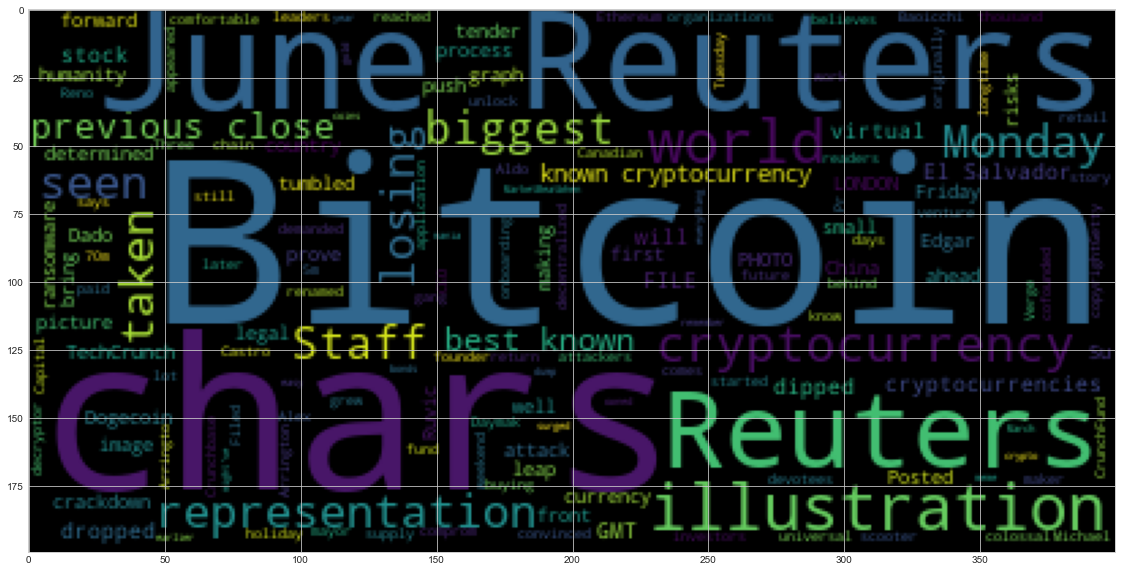

In [26]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

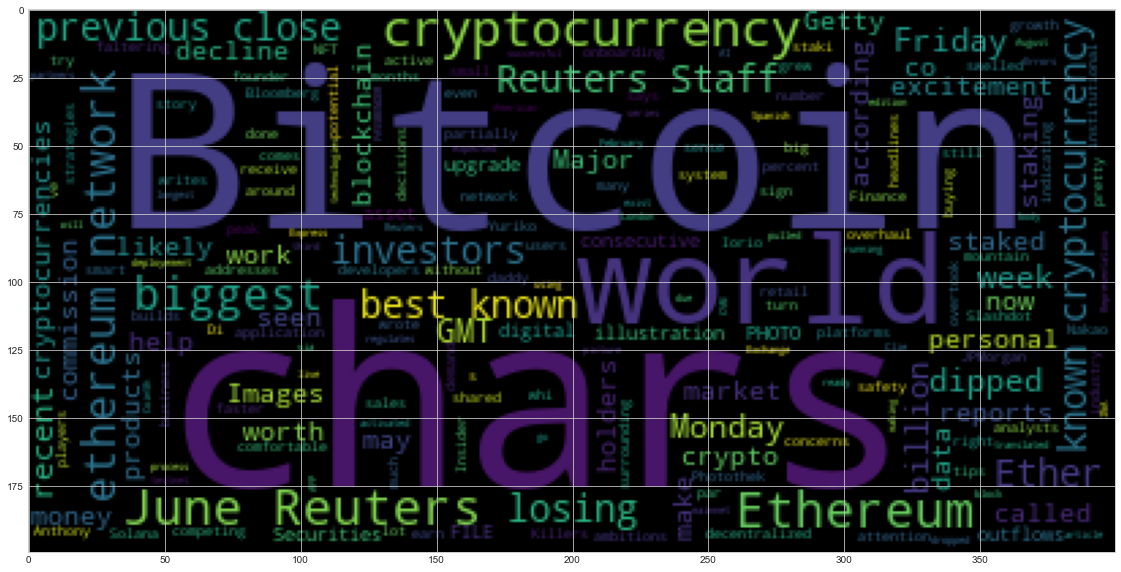

In [27]:

# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(etherium_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund Crunch

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_ner = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!
bitcoin_ner.user_data["title"] = 'bitcoin ner'

In [32]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_ner, style='ent')

In [33]:
# List all Entities
# YOUR CODE HERE!
for entities in bitcoin_ner.ents:
    print(entities.text + ' ' + entities.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
earlier this year DATE
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
as low as $32,288 MONEY
first ORDINAL
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Monday DATE
China GPE
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
Reuters ORG
FILE ORG
J

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
etherium_text = ' '.join(etherium_df.text)
etherium_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars] "Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars] Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
etherium_ner = nlp(etherium_text)
# Add a title to the document
# YOUR CODE HERE!
etherium_ner.user_data["title"] = 'etherium ner'

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(etherium_ner, style='ent')

In [37]:
# List all Entities
# YOUR CODE HERE!
for entities in etherium_ner.ents:
    print(entities.text + ' ' + entities.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG

---